In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn

from numpy import mean

from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

%matplotlib inline

#### Load The data files
###### Display data frame head

In [2]:
data_frame = pd.read_excel('C:/Users/amran/Downloads/oasis_longitudinal_demographics.xlsx')

data_frame.head() 

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


#### Data pre-processing and selection

Lets first look at columns data types

In [3]:
data_frame.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV          float64
nWBV          float64
ASF           float64
dtype: object

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    float64
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(6), int64(4), object(5)
memory usage: 43.8+ KB


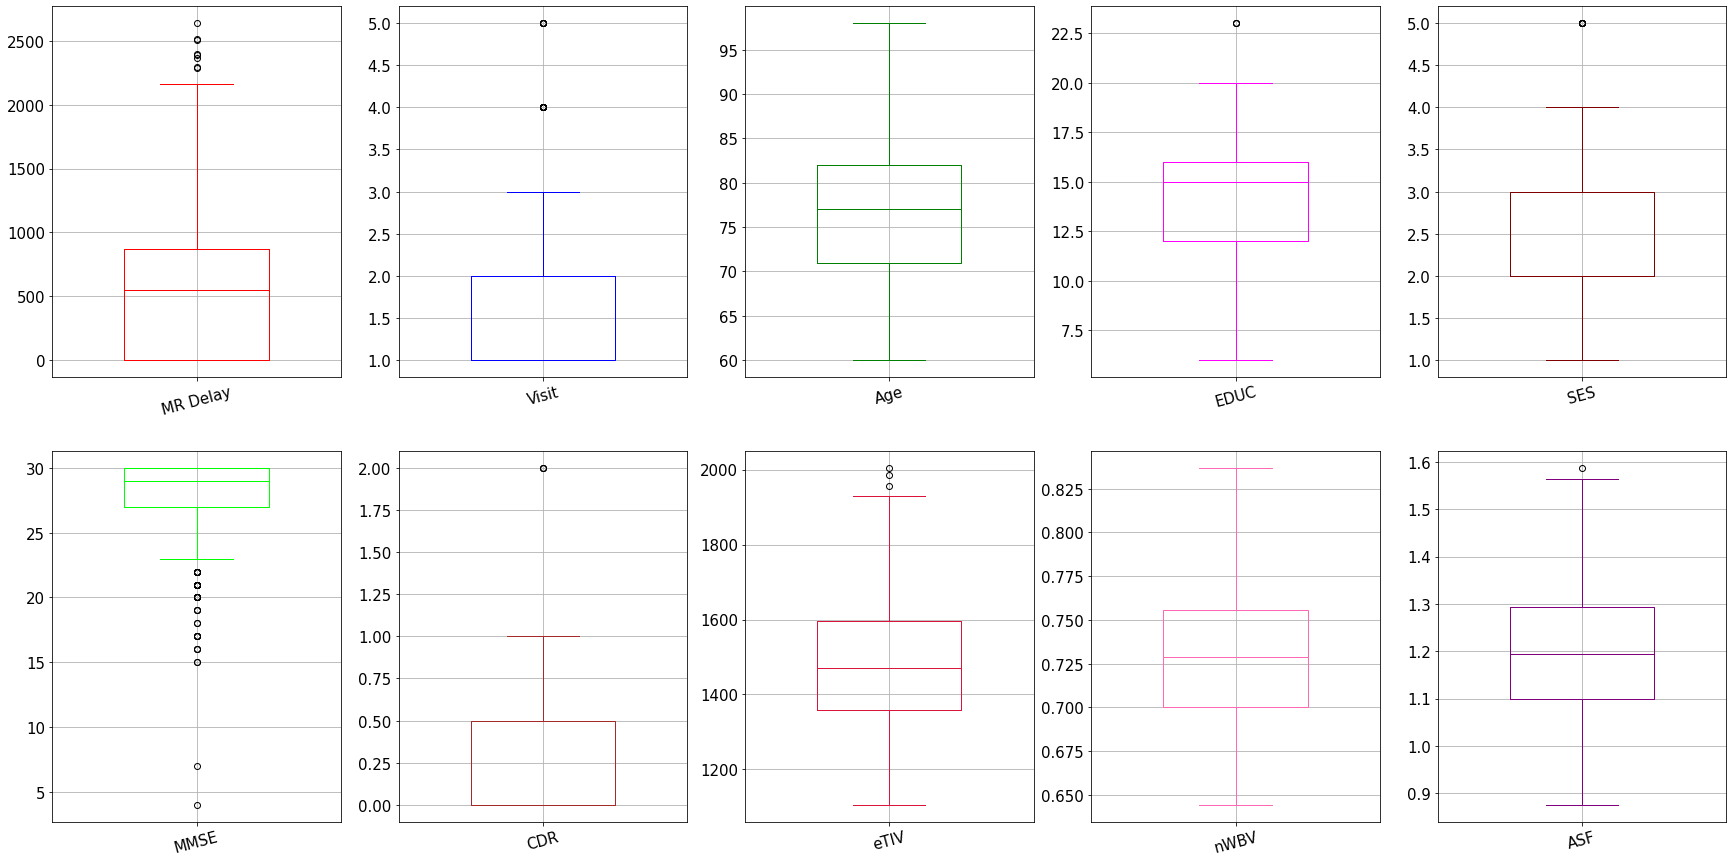

In [5]:
fig,axs = plt.subplots(2,5,figsize =(30,15))
boxplot_mrdelay = data_frame.boxplot(column=['MR Delay'], rot=15, widths=.5,fontsize=15,color = 'red',ax=axs[0,0])
boxplot_visit =data_frame.boxplot(column=['Visit'], rot=15, fontsize=15,widths=.5,color = 'blue',ax=axs[0,1])
boxplot_Age =data_frame.boxplot(column=['Age'], rot=15, fontsize=15,widths=.5,color = 'green',ax=axs[0,2])
boxplot_EDUC = data_frame.boxplot(column=['EDUC'], rot=15, fontsize=15,widths=.5,color = 'magenta',ax=axs[0,3])
boxplot_SES = data_frame.boxplot(column=['SES'], rot=15, fontsize=15,widths=.5,color = 'maroon',ax=axs[0,4])
boxplot_MMSE = data_frame.boxplot(column=['MMSE'], rot=15, fontsize=15,widths=.5,color = 'lime',ax=axs[1,0])
boxplot_CDR = data_frame.boxplot(column=['CDR'], rot=15, fontsize=15,widths=.5,color = 'brown',ax=axs[1,1])
boxplot_eTIV = data_frame.boxplot(column=['eTIV'], rot=15, fontsize=15,widths=.5,color = 'crimson',ax=axs[1,2])
boxplot_nWBV = data_frame.boxplot(column=['nWBV'], rot=15, fontsize=15,widths=.5,color = 'hotpink',ax=axs[1,3])
boxplot_ASF = data_frame.boxplot(column=['ASF'], rot=15, fontsize=15,widths=.5,color = 'purple',ax=axs[1,4])


plt.show()

#### Histogram

array([[<AxesSubplot:title={'center':'Visit'}>,
        <AxesSubplot:title={'center':'MR Delay'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'EDUC'}>,
        <AxesSubplot:title={'center':'SES'}>,
        <AxesSubplot:title={'center':'MMSE'}>],
       [<AxesSubplot:title={'center':'CDR'}>,
        <AxesSubplot:title={'center':'eTIV'}>,
        <AxesSubplot:title={'center':'nWBV'}>],
       [<AxesSubplot:title={'center':'ASF'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

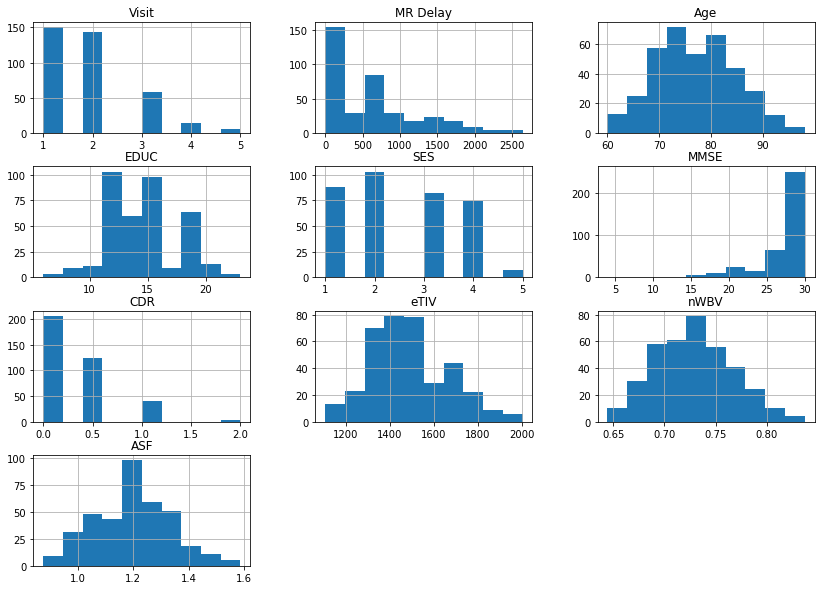

In [6]:
data_frame.hist(figsize =(14,10))

#### Correlation Heatmap

<AxesSubplot:>

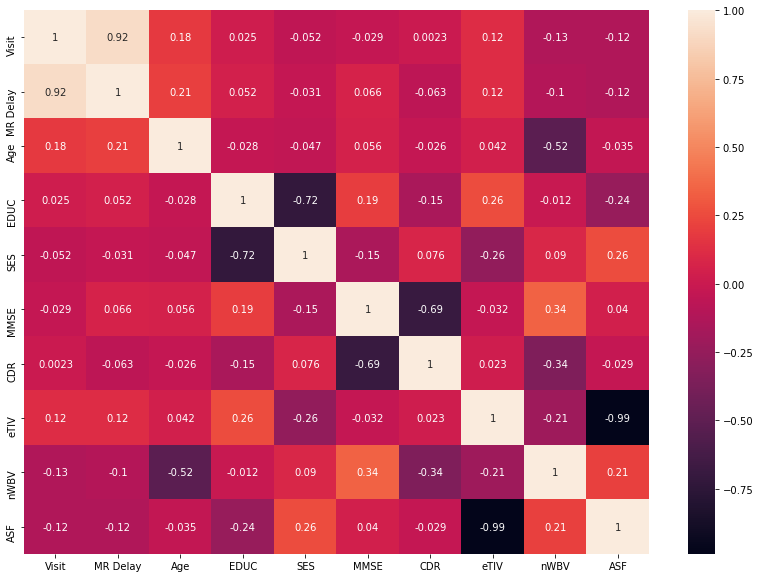

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (14,10))

sns.heatmap(data_frame[data_frame.columns].corr(), annot=True)

#### Dealing the missing values

In [8]:
missing_data = data_frame.isnull()
missing_data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


Count missing values in each column

In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

Subject ID
False    373
Name: Subject ID, dtype: int64
 
MRI ID
False    373
Name: MRI ID, dtype: int64
 
Group
False    373
Name: Group, dtype: int64
 
Visit
False    373
Name: Visit, dtype: int64
 
MR Delay
False    373
Name: MR Delay, dtype: int64
 
M/F
False    373
Name: M/F, dtype: int64
 
Hand
False    373
Name: Hand, dtype: int64
 
Age
False    373
Name: Age, dtype: int64
 
EDUC
False    373
Name: EDUC, dtype: int64
 
SES
False    354
True      19
Name: SES, dtype: int64
 
MMSE
False    371
True       2
Name: MMSE, dtype: int64
 
CDR
False    373
Name: CDR, dtype: int64
 
eTIV
False    373
Name: eTIV, dtype: int64
 
nWBV
False    373
Name: nWBV, dtype: int64
 
ASF
False    373
Name: ASF, dtype: int64
 


In [10]:
# check the details value of SES
data_frame['SES'].value_counts()

2.0    103
1.0     88
3.0     82
4.0     74
5.0      7
Name: SES, dtype: int64

In [11]:
#Here 2 is most common values. use the ".idxmax()" method to calculate for us the most common type automatically:

data_frame['SES'].value_counts().idxmax() 

2.0

In [12]:
#replace null with most common values
data_frame['SES'].fillna(2.0, inplace=True)

In [13]:
#check the details value of MMSE
data_frame['MMSE'].value_counts()

30.0    114
29.0     91
28.0     45
27.0     32
26.0     20
25.0     12
23.0     11
21.0     11
20.0      7
22.0      7
17.0      5
24.0      4
16.0      3
19.0      3
18.0      2
15.0      2
7.0       1
4.0       1
Name: MMSE, dtype: int64

In [14]:
#30 is the most common value. We can also use the ".idxmax()" method to calculate for us the most common type automatically:
data_frame['MMSE'].value_counts().idxmax()

30.0

In [15]:
#replace null with most common values
data_frame['MMSE'].fillna(30,inplace=True)

In [16]:
missing_data = data_frame.isnull()
missing_data.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Subject ID  373 non-null    bool 
 1   MRI ID      373 non-null    bool 
 2   Group       373 non-null    bool 
 3   Visit       373 non-null    bool 
 4   MR Delay    373 non-null    bool 
 5   M/F         373 non-null    bool 
 6   Hand        373 non-null    bool 
 7   Age         373 non-null    bool 
 8   EDUC        373 non-null    bool 
 9   SES         373 non-null    bool 
 10  MMSE        373 non-null    bool 
 11  CDR         373 non-null    bool 
 12  eTIV        373 non-null    bool 
 13  nWBV        373 non-null    bool 
 14  ASF         373 non-null    bool 
dtypes: bool(15)
memory usage: 5.6 KB


In [18]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

Subject ID
False    373
Name: Subject ID, dtype: int64
 
MRI ID
False    373
Name: MRI ID, dtype: int64
 
Group
False    373
Name: Group, dtype: int64
 
Visit
False    373
Name: Visit, dtype: int64
 
MR Delay
False    373
Name: MR Delay, dtype: int64
 
M/F
False    373
Name: M/F, dtype: int64
 
Hand
False    373
Name: Hand, dtype: int64
 
Age
False    373
Name: Age, dtype: int64
 
EDUC
False    373
Name: EDUC, dtype: int64
 
SES
False    373
Name: SES, dtype: int64
 
MMSE
False    373
Name: MMSE, dtype: int64
 
CDR
False    373
Name: CDR, dtype: int64
 
eTIV
False    373
Name: eTIV, dtype: int64
 
nWBV
False    373
Name: nWBV, dtype: int64
 
ASF
False    373
Name: ASF, dtype: int64
 


Let’s see how many of each class is in our data set

In [19]:
data_frame['Subject ID'].value_counts()

OAS2_0073    5
OAS2_0070    5
OAS2_0127    5
OAS2_0048    5
OAS2_0036    4
            ..
OAS2_0008    2
OAS2_0108    2
OAS2_0029    2
OAS2_0113    2
OAS2_0096    2
Name: Subject ID, Length: 150, dtype: int64

In [20]:
# check the total number of subject
data_frame['Subject ID'].nunique()

150

In [21]:
data_frame['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

#### Check for male and female

In [22]:
data_frame.groupby(['M/F','Group'])['Subject ID'].nunique()

M/F  Group      
F    Converted      10
     Demented       28
     Nondemented    50
M    Converted       4
     Demented       36
     Nondemented    22
Name: Subject ID, dtype: int64

#### Group by Male female and Subject ID

In [23]:
data_frame_sub =data_frame.groupby(['M/F','Group'])

In [24]:
data_frame_sub= data_frame_sub.agg({'Subject ID':'nunique'})

In [25]:
data_frame_sub.head()

Subject ID
M/F Group                  
F   Converted            10
    Demented             28
    Nondemented          50
M   Converted             4
    Demented             36

In [26]:
# Change M to 1 and F to 0
data_frame['M/F'] = data_frame['M/F'].replace(['F','M'], [0,1]) 

In [27]:
# Hand cloumn value to numaric data R to 1 and L to 0
data_frame['Hand'] = data_frame['Hand'].replace(['L','R'], [0,1]) # Hand column

In [28]:
# Group :Replace Converted to Demented
data_frame['Group'] = data_frame['Group'].replace(['Converted'], ['Demented'])

In [29]:
data_frame.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,1,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,1,1,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,1,75,12,2.0,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,1,1,76,12,2.0,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,1,1,80,12,2.0,22.0,0.5,1697.911134,0.701236,1.033623


In [30]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    int64  
 6   Hand        373 non-null    int64  
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    float64
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(6), int64(6), object(3)
memory usage: 43.8+ KB


#### New dataframe for male female group with Unique Subject ID 

In [31]:
data_frame_new = data_frame.groupby(['M/F','Group'])


In [32]:
data_frame_new = data_frame_new.agg({'Subject ID':'nunique'})

In [33]:
data_frame_new.head()

Subject ID
M/F Group                  
0   Demented             38
    Nondemented          50
1   Demented             40
    Nondemented          22

<AxesSubplot:>

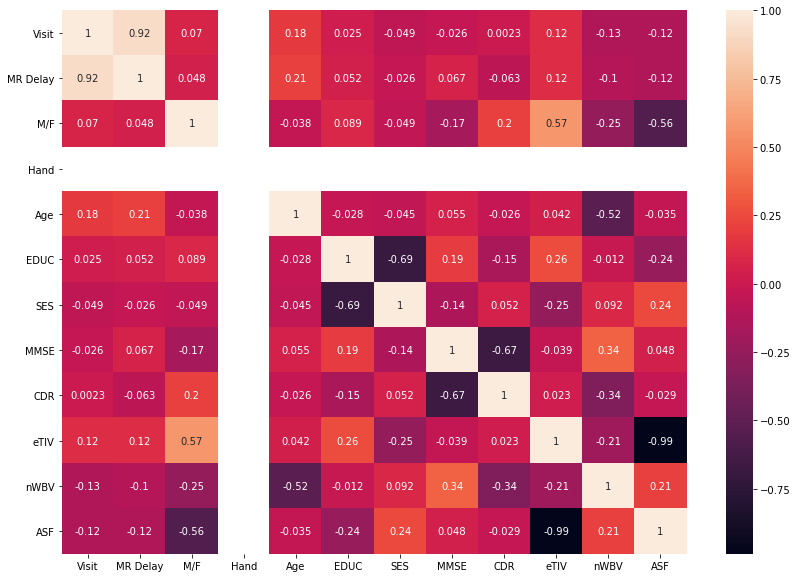

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (14,10))

sns.heatmap(data_frame[data_frame.columns].corr(), annot=True)

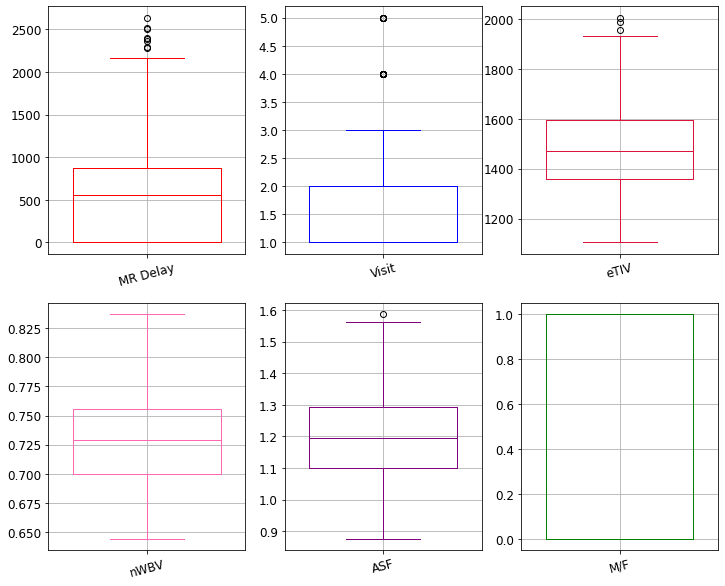

In [35]:
fig,axs = plt.subplots(2,3,figsize =(12,10))
boxplot_mrdelay = data_frame.boxplot(column=['MR Delay'], rot=15, widths=.75,fontsize=12,color = 'red',ax=axs[0,0])
boxplot_visit =data_frame.boxplot(column=['Visit'], rot=15, fontsize=12,widths=.75,color = 'blue',ax=axs[0,1])
boxplot_eTIV = data_frame.boxplot(column=['eTIV'], rot=15, fontsize=12,widths=.75,color = 'crimson',ax=axs[0,2])
boxplot_nWBV = data_frame.boxplot(column=['nWBV'], rot=15, fontsize=12,widths=.75,color = 'hotpink',ax=axs[1,0])
boxplot_ASF = data_frame.boxplot(column=['ASF'], rot=15, fontsize=12,widths=.75,color = 'purple',ax=axs[1,1])
boxplot_MF = data_frame.boxplot(column=['M/F'], rot=15, fontsize=12,widths=.75,color = 'green',ax=axs[1,2])

plt.show()

#### Target value, response variable or dependent variable

In [36]:
y_data = data_frame['Group']

In [37]:
y_data[0:5]

0    Nondemented
1    Nondemented
2       Demented
3       Demented
4       Demented
Name: Group, dtype: object

In [38]:
# Independent variable or regressor as X
# drop unrelated values
X_data = data_frame.drop(['Subject ID','MRI ID','Group'], axis=1)
X_data.head()

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,1,1,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,2,457,1,1,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,1,0,1,1,75,12,2.0,23.0,0.5,1678.290000,0.736336,1.045710
3,2,560,1,1,76,12,2.0,28.0,0.5,1737.620000,0.713402,1.010000
4,3,1895,1,1,80,12,2.0,22.0,0.5,1697.911134,0.701236,1.033623


### Train and Test Split

In [39]:
# import train_test_split library
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

X_train,X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (249, 12) (249,)
Test set: (124, 12) (124,)


#### Normalize Data

Data Standardization give data zero mean and unit variance

In [40]:
X_data= preprocessing.StandardScaler().fit(X_data).transform(X_data)
X_data[0:5]


array([[-0.95706686, -0.93771494,  1.15379808,  0.        ,  1.30873772,
        -0.20813199, -0.3944662 , -0.09706416, -0.77765291,  2.83359462,
        -0.90181966, -2.26232493],
       [ 0.12799678, -0.21761337,  1.15379808,  0.        ,  1.43978716,
        -0.20813199, -0.3944662 ,  0.71958842, -0.77765291,  2.93552502,
        -1.30741435, -2.31961167],
       [-0.95706686, -0.93771494,  1.15379808,  0.        , -0.26385558,
        -0.90439416, -0.3944662 , -1.18593426,  0.55905002,  1.08111854,
         0.18280374, -1.08577527],
       [ 0.12799678, -0.05531476,  1.15379808,  0.        , -0.13280614,
        -0.90439416, -0.3944662 ,  0.17515337,  0.55905002,  1.41841305,
        -0.43550978, -1.34469305],
       [ 1.21306043,  2.04826424,  1.15379808,  0.        ,  0.39139163,
        -0.90439416, -0.3944662 , -1.45815179,  0.55905002,  1.19266583,
        -0.76351198, -1.17341289]])

### Support Vector Machine (SVM)

In [41]:
# import SVM library

from sklearn import svm

In [42]:
svm_clf = svm.SVC(C=1, kernel='linear').fit(X_train, y_train)

In [43]:
yhat_svm = svm_clf.predict(X_test)


In [44]:
SVM_accuracy_score = accuracy_score(y_test,yhat_svm)*100
print("SVM_accuracy_score:", SVM_accuracy_score)

SVM_accuracy_score: 92.74193548387096


In [45]:
# Number of random trials
NUM_TRIALS = 10

# Arrays to store scores
svm_nested_scores = np.zeros(NUM_TRIALS)
svm_non_nested_scores = np.zeros(NUM_TRIALS)

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1]}

In [46]:
# Loop for each trial
for i in range(NUM_TRIALS):


    
    inner_cv = KFold(n_splits=10, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=10, shuffle=True, random_state=i)
    
    # Non_nested parameter search and scoring
    nonnes_svm_clf = GridSearchCV(estimator=svm_clf, param_grid=p_grid, cv=outer_cv)
    nonnes_svm_clf.fit(X_data, y_data)
    svm_non_nested_scores[i] = nonnes_svm_clf.best_score_



    # Nested CV with parameter optimization
    Nes_svm_clf = GridSearchCV(estimator=svm_clf, param_grid=p_grid, cv=inner_cv)
    
    svm_nested_score = cross_val_score(svm_clf, X=X_data, y=y_data, cv=outer_cv)
    
    svm_nested_score[i] = svm_nested_score.mean()
    


In [142]:
svm_non_nested_score_mean = svm_non_nested_scores.mean()
svm_non_nested_score_mean

0.9463157894736842

In [135]:
svm_nested_score_mean = svm_nested_score.mean()
svm_nested_score_mean

0.94649359886202

In [49]:
SVM_nested_vs_non_nested_score =  svm_nested_score - svm_non_nested_scores


print(
    "Average difference of nested and nonnested {:6f} with std. dev. of {:6f}.".format(
        SVM_nested_vs_non_nested_score.mean(), SVM_nested_vs_non_nested_score.std()
    )
)

Average difference of nested and nonnested 0.000178 with std. dev. of 0.023795.


In [50]:
print('SVM Nested Accuracy: %.3f' % (mean(svm_nested_score)*100))

SVM Nested Accuracy: 94.649


In [51]:
print('SVM Nonnested Accuracy: %.3f ' % (mean(svm_non_nested_scores)*100))

SVM Nonnested Accuracy: 94.632 


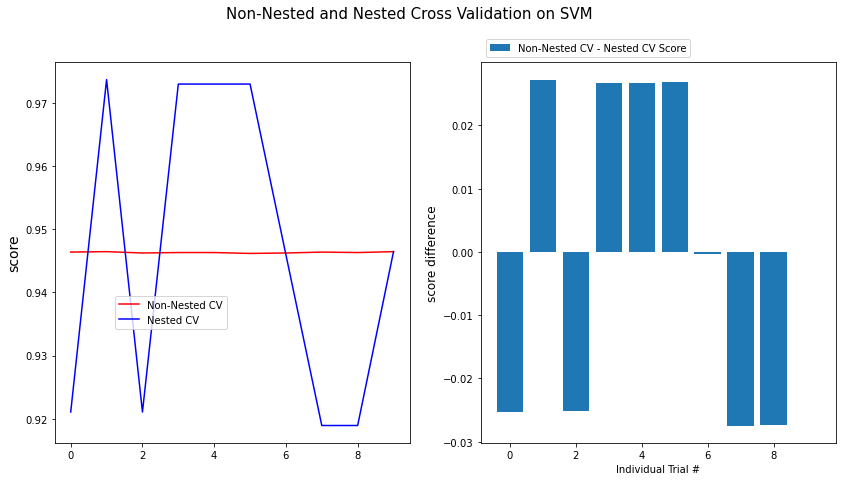

In [52]:
# Plot scores for nested and non-nested CV
plt.figure(figsize=(14, 7))

plt.subplot(1,2,1)
(non_nested_line,) = plt.plot(svm_non_nested_scores, color="r")
(nested_line,) = plt.plot(svm_nested_score, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)

plt.title( "Non-Nested and Nested Cross Validation on SVM", x=1.0, y=1.1, fontsize="15" )


# Plot bar chart of the difference.
plt.subplot(1,2,2)
difference_plot = plt.bar(range(NUM_TRIALS), SVM_nested_vs_non_nested_score)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="12")

plt.show()

##### SVM Confusion matrix

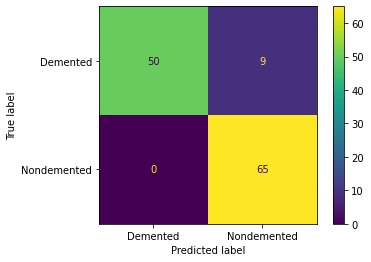

In [53]:
#confusion_matrix(y_test,yhat_svm)
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(svm_clf, X_test, y_test)  
plt.show() 

In [54]:
# Confusion matrix using crosstab method of pandas.
svm_pd = pd.crosstab(y_test, yhat_svm, rownames=['True'], colnames=['Predicted'], margins=True)
svm_pd

Predicted,Demented,Nondemented,All
True,,,
Demented,50,9,59
Nondemented,0,65,65
All,50,74,124


##### SVM Classification Report

In [55]:
#print(classification_report(y_test,yhat_svm))

print("confusion matrix\n",confusion_matrix(y_test,yhat_svm))
print("\nclassification report\n",classification_report(y_test,yhat_svm))
print("Accuracy: ",accuracy_score(y_test, yhat_svm)*100)

confusion matrix
 [[50  9]
 [ 0 65]]

classification report
               precision    recall  f1-score   support

    Demented       1.00      0.85      0.92        59
 Nondemented       0.88      1.00      0.94        65

    accuracy                           0.93       124
   macro avg       0.94      0.92      0.93       124
weighted avg       0.94      0.93      0.93       124

Accuracy:  92.74193548387096


In [56]:
SVM_roc_auc_score = roc_auc_score(y_test, svm_clf.decision_function(X_test), average=None)
print("SVM_roc_auc_score:", SVM_roc_auc_score)

SVM_roc_auc_score: 0.951238591916558


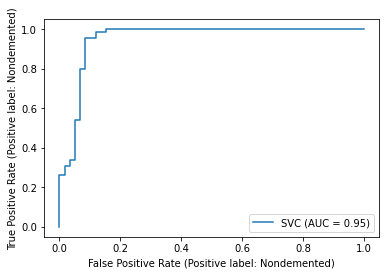

In [57]:
 metrics.plot_roc_curve(svm_clf, X_test, y_test)  
 plt.show() 

### Logistic Regression

In [58]:
#import Library LogisticRegression
from sklearn.linear_model import LogisticRegression

In [59]:
#Train

lr_clf = LogisticRegression(C=1, solver='liblinear').fit(X_train,y_train)
lr_clf


LogisticRegression(C=1, solver='liblinear')

In [60]:
yhat_lr = lr_clf.predict(X_test)

lr_yhat_prob = lr_clf.predict_proba(X_test)

In [61]:
LR_accuracy_score = accuracy_score(y_test,yhat_lr)*100
print("LR_accuracy_score :",LR_accuracy_score )

LR_accuracy_score : 92.74193548387096


##### LR Confusion matrix

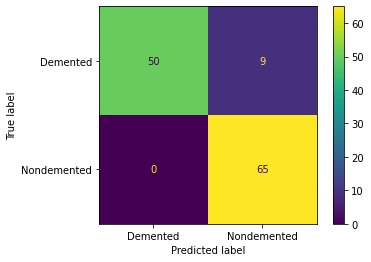

In [62]:
#confusion_matrix(y_test,yhat_lr)

plot_confusion_matrix(lr_clf, X_test, y_test)  
plt.show() 

In [63]:
# Confusion matrix using crosstab method of pandas.
LR_pd = pd.crosstab(y_test, yhat_lr, rownames=['True'], colnames=['Predicted'], margins=True)
LR_pd


Predicted,Demented,Nondemented,All
True,,,
Demented,50,9,59
Nondemented,0,65,65
All,50,74,124


##### LR Classification Report

In [64]:
#print(classification_report(y_test,yhat_lr))

print("confusion matrix\n",confusion_matrix(y_test,yhat_lr))
print("\nclassification report\n",classification_report(y_test,yhat_lr))
print("Accuracy: ",accuracy_score(y_test, yhat_lr)*100)

confusion matrix
 [[50  9]
 [ 0 65]]

classification report
               precision    recall  f1-score   support

    Demented       1.00      0.85      0.92        59
 Nondemented       0.88      1.00      0.94        65

    accuracy                           0.93       124
   macro avg       0.94      0.92      0.93       124
weighted avg       0.94      0.93      0.93       124

Accuracy:  92.74193548387096


In [65]:
LR_roc_auc_score= roc_auc_score(y_test, lr_clf.decision_function(X_test), average=None)
print("LR_roc_auc_score :",LR_roc_auc_score )

LR_roc_auc_score : 0.9731421121251629


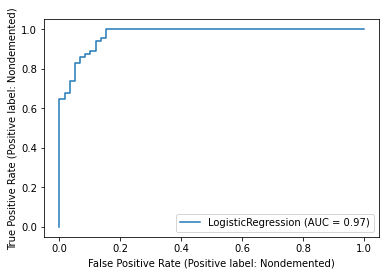

In [66]:
 metrics.plot_roc_curve(lr_clf, X_test, y_test)  
 plt.show() 

In [67]:

NUM_TRIALS = 10


lr_nested_scores = np.zeros(NUM_TRIALS)
lr_non_nested_scores = np.zeros(NUM_TRIALS)

p_grid = {"C": [1, 10, 100]}

# Loop for each trial
for i in range(NUM_TRIALS):


    
    inner_cv = KFold(n_splits=10, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=10, shuffle=True, random_state=i)
    
    nonnes_lr_clf = GridSearchCV(estimator=lr_clf, param_grid=p_grid, cv=outer_cv)
    nonnes_lr_clf.fit(X_data, y_data)
    lr_non_nested_scores[i] = nonnes_lr_clf.best_score_



    # Nested CV with parameter optimization
    Nes_lrclf = GridSearchCV(estimator=lr_clf, param_grid=p_grid, cv=inner_cv)
    
    lr_nested_score = cross_val_score(lr_clf, X=X_data, y=y_data, cv=outer_cv)
    lr_nested_score[i] = lr_nested_score.mean()

In [68]:
LR_nested_vs_non_nested_score =  lr_nested_score - lr_non_nested_scores


print(
    "Average difference of nested and nonnested {:6f} with std. dev. of {:6f}.".format(
        LR_nested_vs_non_nested_score.mean(), LR_nested_vs_non_nested_score.std()
    )
) 

Average difference of nested and nonnested 0.000171 with std. dev. of 0.024929.


In [69]:
print('LR Nested Accuracy: %.3f' % (mean(lr_nested_score)*100))


print('LR Nonnested Accuracy: %.3f ' % (mean(lr_non_nested_scores)*100))

LR Nested Accuracy: 94.352
LR Nonnested Accuracy: 94.335 


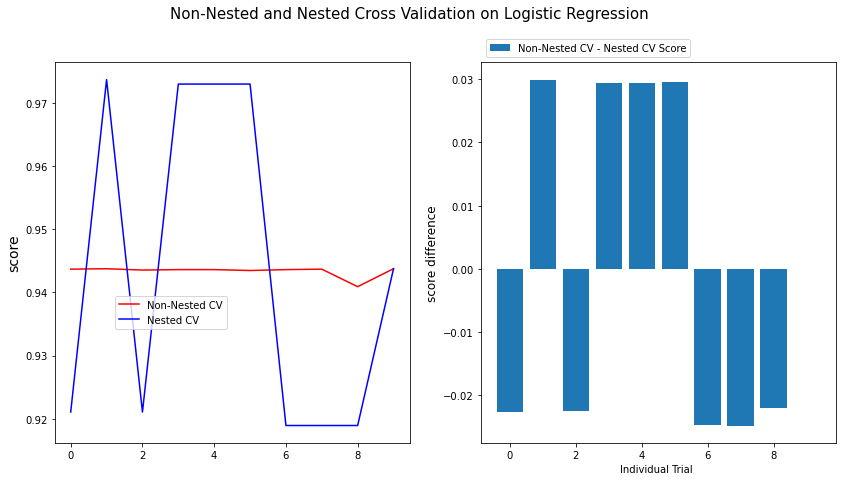

In [70]:
# Plot scores for nested and non-nested CV
plt.figure(figsize=(14, 7))

plt.subplot(1,2,1)
(non_nested_line,) = plt.plot(lr_non_nested_scores, color="r")
(nested_line,) = plt.plot(lr_nested_score, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)

plt.title( "Non-Nested and Nested Cross Validation on Logistic Regression", x=1.0, y=1.1, fontsize="15" )


# Plot bar chart of the difference.
plt.subplot(1,2,2)
difference_plot = plt.bar(range(NUM_TRIALS), LR_nested_vs_non_nested_score)
plt.xlabel("Individual Trial ")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="12")

plt.show()

In [127]:
lr_nested_score_mean = lr_nested_score.mean()
lr_nested_score_mean

0.943520625889047

In [136]:
lr_non_nested_score_mean = lr_non_nested_scores.mean()
lr_non_nested_score_mean

0.9433499288762446

### Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier().fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_yhat_prob = rf_clf.predict_proba(X_test)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("confusion matrix\n",confusion_matrix(y_test,rf_pred))
print("\nclassification report\n",classification_report(y_test,rf_pred))
print("Accuracy: ",accuracy_score(y_test, rf_pred)*100)

confusion matrix
 [[51  8]
 [ 0 65]]

classification report
               precision    recall  f1-score   support

    Demented       1.00      0.86      0.93        59
 Nondemented       0.89      1.00      0.94        65

    accuracy                           0.94       124
   macro avg       0.95      0.93      0.93       124
weighted avg       0.94      0.94      0.94       124

Accuracy:  93.54838709677419


In [73]:
RF_accuracy_score = accuracy_score(y_test,rf_pred)*100
print("RF_accuracy_score :",RF_accuracy_score )

RF_accuracy_score : 93.54838709677419


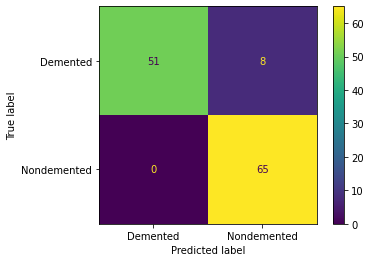

In [74]:
plot_confusion_matrix(rf_clf, X_test, y_test)  
plt.show() 

In [75]:
# Confusion matrix using crosstab method of pandas.
RF_pd = pd.crosstab(y_test, rf_pred, rownames=['True'], colnames=['Predicted'], margins=True)
RF_pd

Predicted,Demented,Nondemented,All
True,,,
Demented,51,8,59
Nondemented,0,65,65
All,51,73,124


In [76]:
RF_roc_auc_score= roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1], average=None)
print("RF roc_auc score :",RF_roc_auc_score )


RF roc_auc score : 0.9754889178617991


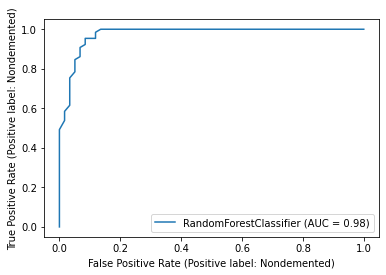

In [77]:
metrics.plot_roc_curve(rf_clf, X_test, y_test)  
    
plt.show() 

In [78]:

NUM_TRIALS = 10


rf_nested_scores = np.zeros(NUM_TRIALS)
rf_non_nested_scores = np.zeros(NUM_TRIALS)


p_grid = { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,5,10],
    'min_samples_split': [2, 5, 10],
    'criterion' :['gini', 'entropy']
}


# Loop for each trial
for i in range(NUM_TRIALS):

    
    inner_cv = KFold(n_splits=10, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=10, shuffle=True, random_state=i)
    
    
    nonnes_rf_clf = GridSearchCV(estimator=rf_clf, param_grid=p_grid, cv=outer_cv)
    nonnes_rf_clf.fit(X_data, y_data)
    rf_non_nested_scores[i] = nonnes_rf_clf.best_score_



    # Nested CV with parameter optimization
    Nes_rfclf = GridSearchCV(estimator=rf_clf, param_grid=p_grid, cv=inner_cv)
    
    rf_nested_score = cross_val_score(rf_clf, X=X_data, y=y_data, cv=outer_cv)
    rf_nested_score[i] = rf_nested_score.mean()
    

In [79]:
RF_nested_vs_non_nested_score = rf_non_nested_scores- rf_nested_score 


print(
    "Average difference of nested and nonnested {:6f} with std. dev. of {:6f}.".format(
        RF_nested_vs_non_nested_score.mean(), RF_nested_vs_non_nested_score.std()
    )
)

Average difference of nested and nonnested 0.003065 with std. dev. of 0.018590.


In [80]:
print('RF Nested Accuracy: %.3f' % (mean(rf_nested_score)*100))


print('RF Nonnested Accuracy: %.3f ' % (mean(rf_non_nested_scores)*100))

RF Nested Accuracy: 94.649
RF Nonnested Accuracy: 94.956 


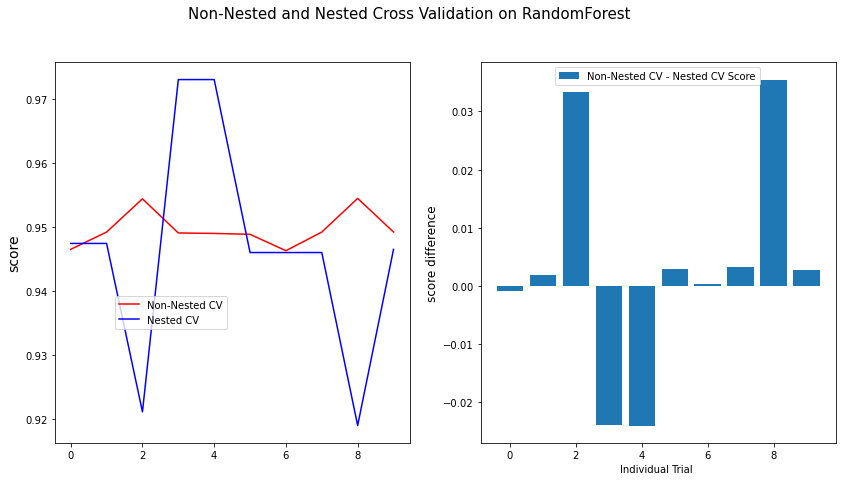

In [81]:

plt.figure(figsize=(14, 7))

plt.subplot(1,2,1)
(non_nested_line,) = plt.plot(rf_non_nested_scores, color="r")
(nested_line,) = plt.plot(rf_nested_score, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)

plt.title( "Non-Nested and Nested Cross Validation on RandomForest", x=1.0, y=1.1, fontsize="15" )


# Plot bar chart of the difference.
plt.subplot(1,2,2)
difference_plot = plt.bar(range(NUM_TRIALS), RF_nested_vs_non_nested_score)
plt.xlabel("Individual Trial ")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="12")

plt.show()

In [128]:
rf_nested_score_mean = rf_nested_score.mean()
rf_nested_score_mean

0.9464935988620198

In [137]:
rf_non_nested_score_mean = rf_non_nested_scores.mean()
rf_non_nested_score_mean

0.9495590327169274

### Naive Bayes 


In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
gnb_clf = GaussianNB()

In [84]:
y_pred_gnb = gnb_clf.fit(X_train, y_train).predict(X_test)

In [85]:
#yhat_gnb = gnb.predict(X_test)

gnb_yhat_prob = gnb_clf.predict_proba(X_test)

In [86]:
gnb_Accuracy_score = metrics.accuracy_score(y_test, y_pred_gnb)*100
gnb_Accuracy_score

93.54838709677419

In [87]:

print("confusion matrix\n",confusion_matrix(y_test,y_pred_gnb))
print("\nclassification report\n",classification_report(y_test,y_pred_gnb))
print("Accuracy: ",accuracy_score(y_test, y_pred_gnb)*100)

confusion matrix
 [[51  8]
 [ 0 65]]

classification report
               precision    recall  f1-score   support

    Demented       1.00      0.86      0.93        59
 Nondemented       0.89      1.00      0.94        65

    accuracy                           0.94       124
   macro avg       0.95      0.93      0.93       124
weighted avg       0.94      0.94      0.94       124

Accuracy:  93.54838709677419


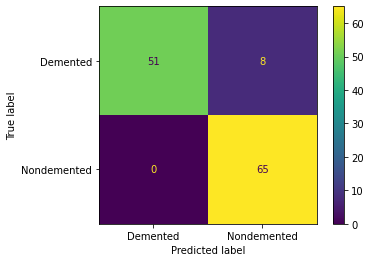

In [88]:
plot_confusion_matrix(gnb_clf, X_test, y_test)  
plt.show() 

In [89]:
# Confusion matrix using crosstab method of pandas.
GNV_pd = pd.crosstab(y_test, y_pred_gnb, rownames=['True'], colnames=['Predicted'], margins=True)
GNV_pd

Predicted,Demented,Nondemented,All
True,,,
Demented,51,8,59
Nondemented,0,65,65
All,51,73,124


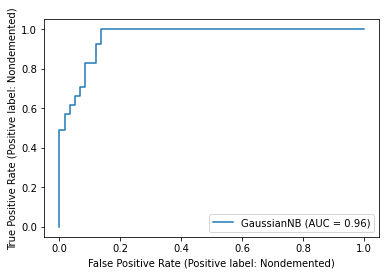

In [90]:
metrics.plot_roc_curve(gnb_clf, X_test, y_test)  
    
plt.show() 

In [91]:
gnb_roc_auc_score= roc_auc_score(y_test, gnb_clf.predict_proba(X_test)[:,1], average=None)
print("GNB roc_auc score :",gnb_roc_auc_score )


GNB roc_auc score : 0.9598435462842243


In [92]:
gnb_clf.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [93]:

NUM_TRIALS = 10

gnb_nested_scores = np.zeros(NUM_TRIALS)
gnb_non_nested_scores = np.zeros(NUM_TRIALS)

p_grid =  { }

#"priors" : "None",  "var_smoothing" : 1e-9 

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    
    inner_cv = KFold(n_splits=10, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=10, shuffle=True, random_state=i)
    
    
     # Non_nested parameter search and scoring
    nonnes_gnb_clf = GridSearchCV(estimator=gnb_clf, param_grid=p_grid, cv=outer_cv)
    nonnes_gnb_clf.fit(X_data, y_data)
    gnb_non_nested_scores[i] = nonnes_gnb_clf.best_score_



    # Nested CV with parameter optimization
    Nes_gnbclf = GridSearchCV(estimator=gnb_clf, param_grid=p_grid, cv=inner_cv)
    
    gnb_nested_score = cross_val_score(gnb_clf, X=X_data, y=y_data, cv=outer_cv)
    gnb_nested_score[i] = gnb_nested_score.mean()



In [129]:
gnb_nested_score_mean = gnb_nested_score.mean()
gnb_nested_score_mean

0.9464153627311523

In [138]:
gnb_non_nested_score_mean = gnb_non_nested_scores.mean()
gnb_non_nested_score_mean

0.9449573257467995

In [95]:
GNB_nested_vs_non_nested_score =  gnb_nested_score - gnb_non_nested_scores


print(
    "Average difference of nested and nonnested {:6f} with std. dev. of {:6f}.".format(
        GNB_nested_vs_non_nested_score.mean(), GNB_nested_vs_non_nested_score.std()
    )
)

Average difference of nested and nonnested 0.001458 with std. dev. of 0.026971.


In [96]:

print('GNB Nested Accuracy: %.3f' % (mean(gnb_nested_score)*100))


print('GNB Nonnested Accuracy: %.3f ' % (mean(gnb_non_nested_scores)*100))

GNB Nested Accuracy: 94.642
GNB Nonnested Accuracy: 94.496 


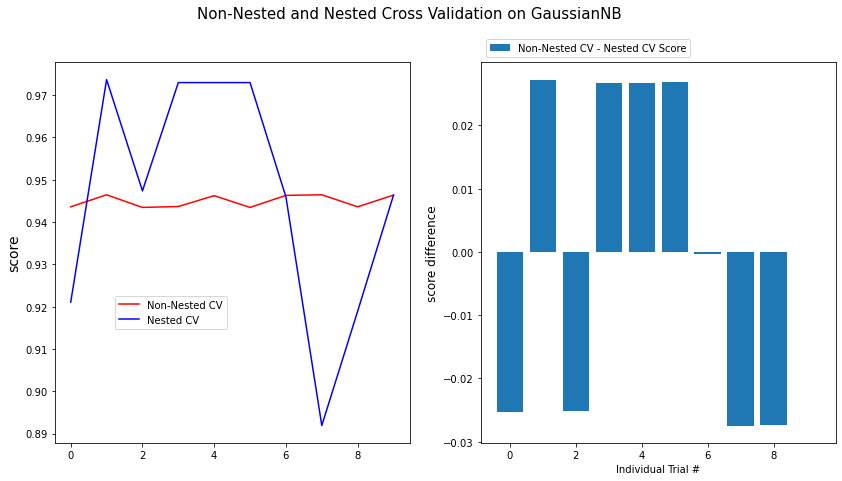

In [97]:

# Plot scores for nested and non-nested CV
plt.figure(figsize=(14, 7))

plt.subplot(1,2,1)
(non_nested_line,) = plt.plot(gnb_non_nested_scores, color="r")
(nested_line,) = plt.plot(gnb_nested_score, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)

plt.title( "Non-Nested and Nested Cross Validation on GaussianNB", x=1.0, y=1.1, fontsize="15" )


# Plot bar chart of the difference.
plt.subplot(1,2,2)
difference_plot = plt.bar(range(NUM_TRIALS), SVM_nested_vs_non_nested_score)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="12")

plt.show()

### Ada Boosting 

In [98]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=42)

In [99]:
yhat_ada = ada_clf.predict(X_test)

#yhat_ada

In [100]:
ada_yhat_prob = ada_clf.predict_proba(X_test)
#ada_yhat_prob

In [101]:
ada_accuracy_score =accuracy_score(y_test, yhat_ada)*100
print("ada_accuracy_score :", ada_accuracy_score )


ada_accuracy_score : 93.54838709677419


In [102]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("confusion matrix\n",confusion_matrix(y_test,yhat_ada))
print("\nclassification report\n",classification_report(y_test,yhat_ada))
print("Accuracy: ",accuracy_score(y_test, yhat_ada)*100)


confusion matrix
 [[52  7]
 [ 1 64]]

classification report
               precision    recall  f1-score   support

    Demented       0.98      0.88      0.93        59
 Nondemented       0.90      0.98      0.94        65

    accuracy                           0.94       124
   macro avg       0.94      0.93      0.93       124
weighted avg       0.94      0.94      0.94       124

Accuracy:  93.54838709677419


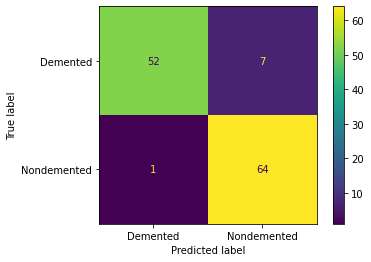

In [103]:
plot_confusion_matrix(ada_clf, X_test, y_test)  
plt.show() 

In [104]:
# Confusion matrix using crosstab method of pandas.
ada_pd = pd.crosstab(y_test, yhat_ada, rownames=['True'], colnames=['Predicted'], margins=True)
ada_pd

Predicted,Demented,Nondemented,All
True,,,
Demented,52,7,59
Nondemented,1,64,65
All,53,71,124


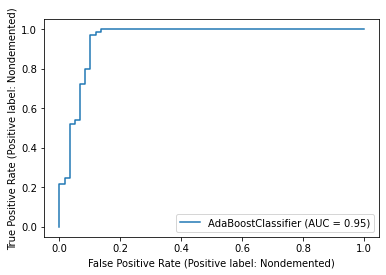

In [105]:
metrics.plot_roc_curve(ada_clf, X_test, y_test)  
    
plt.show() 

In [106]:
ada_roc_auc_score= roc_auc_score(y_test, ada_clf.decision_function(X_test), average=None)
print("ada_roc_auc_score :",ada_roc_auc_score )

ada_roc_auc_score : 0.9491525423728814


In [107]:

NUM_TRIALS = 10


ada_nested_scores = np.zeros(NUM_TRIALS)
ada_non_nested_scores = np.zeros(NUM_TRIALS)


p_grid={'n_estimators':[100,200,500],'learning_rate':[.001,0.01,.1]}

# Loop for each trial
for i in range(NUM_TRIALS):

 
    
    inner_cv = KFold(n_splits=10, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=10, shuffle=True, random_state=i)
    
    # Non_nested parameter search and scoring
    nonnes_ada_clf = GridSearchCV(estimator=ada_clf, param_grid=p_grid, cv=outer_cv)
    nonnes_ada_clf.fit(X_data, y_data)
    ada_non_nested_scores[i] = nonnes_ada_clf.best_score_


    # Nested CV with parameter optimization
    Nes_adaclf = GridSearchCV(estimator=ada_clf, param_grid=p_grid, cv=inner_cv)
    
    ada_nested_score = cross_val_score(ada_clf, X=X_data, y=y_data, cv=outer_cv)
    ada_nested_score[i] = ada_nested_score.mean()



In [108]:
ADA_nested_vs_non_nested_score = ada_non_nested_scores - ada_nested_score


print(
    "Average difference of nested and nonnested {:6f} with std. dev. of {:6f}.".format(
        ADA_nested_vs_non_nested_score.mean(), ADA_nested_vs_non_nested_score.std()
    )
)

Average difference of nested and nonnested 0.020007 with std. dev. of 0.030582.


In [109]:

print('ADA Nested Accuracy: %.3f' % (mean(ada_nested_score)*100))


print('ADA Nonnested Accuracy: %.3f ' % (mean(ada_non_nested_scores)*100))


ADA Nested Accuracy: 92.873
ADA Nonnested Accuracy: 94.874 


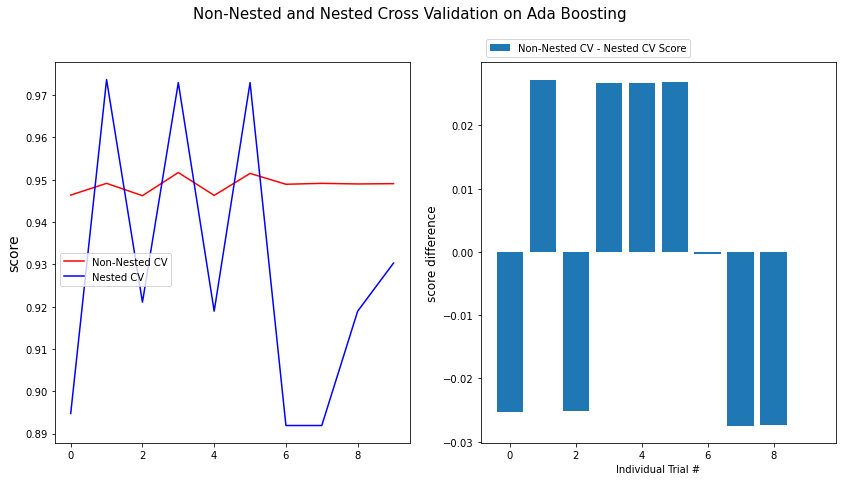

In [146]:
# Plot scores for nested and non-nested CV
plt.figure(figsize=(14, 7))

plt.subplot(1,2,1)
(non_nested_line,) = plt.plot(ada_non_nested_scores, color="r")
(nested_line,) = plt.plot(ada_nested_score, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)

plt.title( "Non-Nested and Nested Cross Validation on Ada Boosting", x=1.0, y=1.1, fontsize="15" )


# Plot bar chart of the difference.
plt.subplot(1,2,2)
difference_plot = plt.bar(range(NUM_TRIALS), SVM_nested_vs_non_nested_score)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="12")

plt.show()

In [130]:
ada_nested_score_mean = ada_nested_score.mean()
ada_nested_score_mean

0.9287339971550498

In [139]:
ada_non_nested_score_mean = ada_non_nested_scores.mean()
ada_non_nested_score_mean

0.9487411095305832

### Gradient boosting 

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
Gra_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                     max_depth=1, random_state=0).fit(X_train, y_train)


In [113]:
Gra_clf.score(X_test, y_test)

0.9274193548387096

In [114]:
yhat_Gra_cl = Gra_clf.predict(X_test)

Gra_yhat_prob = Gra_clf.predict_proba(X_test)

In [115]:

gra_accuracy_score = Gra_clf.score(X_test, y_test)*100
print("gra_accuracy_score :", gra_accuracy_score )

gra_accuracy_score : 92.74193548387096


In [116]:


print("confusion matrix\n",confusion_matrix(y_test,yhat_Gra_cl))
print("\nclassification report\n",classification_report(y_test,yhat_Gra_cl))
print("Accuracy: ",accuracy_score(y_test, yhat_Gra_cl)*100)

confusion matrix
 [[52  7]
 [ 2 63]]

classification report
               precision    recall  f1-score   support

    Demented       0.96      0.88      0.92        59
 Nondemented       0.90      0.97      0.93        65

    accuracy                           0.93       124
   macro avg       0.93      0.93      0.93       124
weighted avg       0.93      0.93      0.93       124

Accuracy:  92.74193548387096


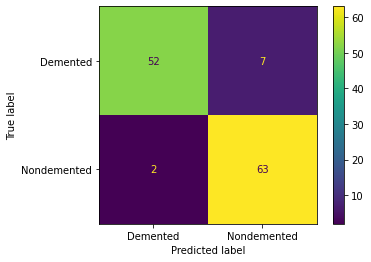

In [117]:
plot_confusion_matrix(Gra_clf, X_test, y_test)  
plt.show() 

In [118]:
# Confusion matrix using crosstab method of pandas.
Gra_pd = pd.crosstab(y_test, yhat_Gra_cl, rownames=['True'], colnames=['Predicted'], margins=True)
Gra_pd

Predicted,Demented,Nondemented,All
True,,,
Demented,52,7,59
Nondemented,2,63,65
All,54,70,124


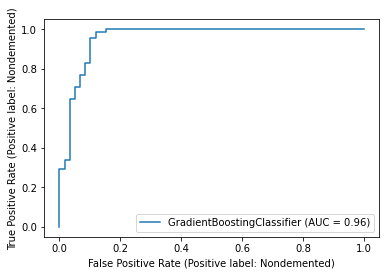

In [119]:
metrics.plot_roc_curve(Gra_clf, X_test, y_test)  
    
plt.show() 

In [120]:
gra_roc_auc_score= roc_auc_score(y_test, Gra_clf.decision_function(X_test), average=None)
print("gra_roc_auc_score :",gra_roc_auc_score )

gra_roc_auc_score : 0.9577574967405476


In [121]:

NUM_TRIALS = 10


gra_nested_scores = np.zeros(NUM_TRIALS)
gra_non_nested_scores = np.zeros(NUM_TRIALS)

p_grid = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }


for i in range(NUM_TRIALS):


    
    inner_cv = KFold(n_splits=10, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=10, shuffle=True, random_state=i)
    
    # Non_nested parameter search and scoring
    nonnes_gra_clf = GridSearchCV(estimator=Gra_clf, param_grid=p_grid, cv=outer_cv)
    nonnes_gra_clf.fit(X_data, y_data)
    gra_non_nested_scores[i] = nonnes_gra_clf.best_score_



    # Nested CV with parameter optimization
    Nes_graclf = GridSearchCV(estimator=Gra_clf, param_grid=p_grid, cv=inner_cv)
    
    gra_nested_scores = cross_val_score(Gra_clf, X=X_data, y=y_data, cv=outer_cv)
    gra_nested_scores[i] = gra_nested_scores.mean()


In [122]:
GRA_nested_vs_non_nested_score =  gra_nested_scores - gra_non_nested_scores


print(
    "Average difference of nested and nonnested {:6f} with std. dev. of {:6f}.".format(
        GRA_nested_vs_non_nested_score.mean(), GRA_nested_vs_non_nested_score.std()
    )
)

Average difference of nested and nonnested -0.003222 with std. dev. of 0.025631.


In [123]:


print('Gradient Nested Accuracy: %.3f' % (mean(gra_nested_scores)*100))


print('Gradient Nonnested Accuracy: %.3f ' % (mean(gra_non_nested_scores)*100))

Gradient Nested Accuracy: 94.309
Gradient Nonnested Accuracy: 94.632 


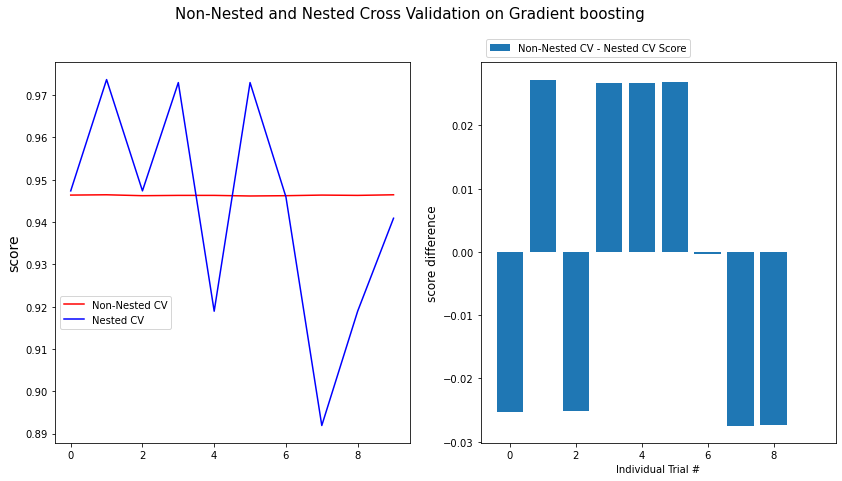

In [124]:
# Plot scores for nested and non-nested CV
plt.figure(figsize=(14, 7))

plt.subplot(1,2,1)
(non_nested_line,) = plt.plot(gra_non_nested_scores, color="r")
(nested_line,) = plt.plot(gra_nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)

plt.title( "Non-Nested and Nested Cross Validation on Gradient boosting", x=1.0, y=1.1, fontsize="15" )


# Plot bar chart of the difference.
plt.subplot(1,2,2)
difference_plot = plt.bar(range(NUM_TRIALS), SVM_nested_vs_non_nested_score)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="12")

plt.show()

In [131]:
gra_nested_score_mean = gra_nested_scores.mean()
gra_nested_score_mean

0.9430938833570414

In [140]:
gra_non_nested_score_mean = gra_non_nested_scores.mean()
gra_non_nested_score_mean

0.9463157894736842

### Results
#### Accuracy score report dataframe

In [144]:
# create a accuracy list
accuracy_score = [ SVM_accuracy_score,LR_accuracy_score,RF_accuracy_score,gnb_Accuracy_score,
                  ada_accuracy_score,gra_accuracy_score]

# create a AUC-score list
auc_score = [SVM_roc_auc_score,LR_roc_auc_score,RF_roc_auc_score,gnb_roc_auc_score,
             ada_roc_auc_score,gra_roc_auc_score,]


# create a nested-score list
Nested_score = [svm_nested_score_mean,lr_nested_score_mean,rf_nested_score_mean,
                gnb_nested_score_mean,ada_nested_score_mean,gra_nested_score_mean]

# create a non_nested-score list
Non_Nested_score = [svm_non_nested_score_mean,lr_non_nested_score_mean,rf_non_nested_score_mean,
                gnb_non_nested_score_mean,ada_non_nested_score_mean,gra_non_nested_score_mean]


# fomulate the report format
df_report = pd.DataFrame(accuracy_score, index=['SVM','Logistic Regression','Random Forest',
                                                'Naive Bayes','Ada Boosting','Gradient boosting'])
df_report.columns = ['Accuracy Score']
df_report.insert(loc=1, column='ROC AUC Score', value= auc_score)
df_report.insert(loc=2, column='Nested Score (mean)', value= Nested_score)
df_report.insert(loc=3, column='Non Nested Score (mean)', value= Non_Nested_score)
df_report.columns.name = 'Algorithm'
df_report

Algorithm,Accuracy Score,ROC AUC Score,Nested Score (mean),Non Nested Score (mean)
SVM,92.741935,0.951239,0.946494,0.946316
Logistic Regression,92.741935,0.973142,0.943521,0.943350
Random Forest,93.548387,0.975489,0.946494,0.949559
Naive Bayes,93.548387,0.959844,0.946415,0.944957
Ada Boosting,93.548387,0.949153,0.928734,0.948741
Gradient boosting,92.741935,0.957757,0.943094,0.946316


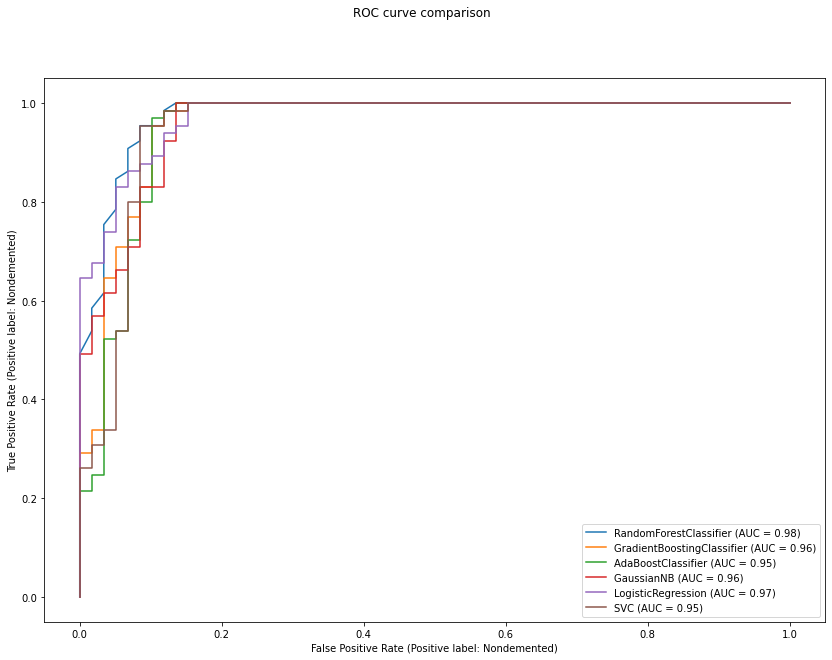

In [126]:
fig = metrics.plot_roc_curve(rf_clf, X_test, y_test) 
fig = metrics.plot_roc_curve(Gra_clf, X_test, y_test,ax = fig.ax_ )
fig = metrics.plot_roc_curve(ada_clf, X_test, y_test,ax = fig.ax_ )
fig = metrics.plot_roc_curve(gnb_clf, X_test, y_test,ax = fig.ax_ )
#metrics.plot_roc_curve(rf_regressor, X_test, y_test)  
fig = metrics.plot_roc_curve(lr_clf, X_test, y_test,ax = fig.ax_ )  
fig = metrics.plot_roc_curve(svm_clf, X_test, y_test,ax = fig.ax_ )  


fig.figure_.suptitle("ROC curve comparison")
fig.figure_.set_size_inches(14,10)
plt.show() 